# Movie Rating Visualization

## This project is to practice data manipulation with Pandas and plotting with Matplotlib.

The goal of this project is to create an interactive interface for users to input desired total number of movies they want to retrieve, and then provide them with visualizations of the statistical summary for the required movies. 

**Visualizations include**:
1. **Plot 1**: displays the `average rating` by voters in the four age groups identified in the data for a set of movies selected by the user.
2. **Plot 2**: displays a bar graph, showing `what percentage` of all votes for a movie is contributed by each specific age-gender group.
<br>

**Age Groups Columns**:
1. `VotesU18`: voters under 18 
2. `Votes1829`: between 18 and 29, inclusively
3. `Votes3044`: between 30 and 44, inclusively
4. `Votes45A`: voters 45 and older
<br>

**Future Development:**
As this program is created with certain data entry assumptions, the following items will be implemented in the future:
1. error handling for invalid subfolder name 
2. error handling for invalid number entry

In [1]:
import os.path 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Global variables:
TITLE = 'Title'
GENRE = 'Genre1'
AGEGROUP = ['VotesU18', 'Votes1829', 'Votes3044', 'Votes45A']
NEWAGEGROUP = ['<18', '18-29', '30-44', '>44']
AGEGENDER = ['CVotesU18F', 'CVotes1829F', 'CVotes3044F', 'CVotes45AF', \
             'CVotesU18M', 'CVotes1829M', 'CVotes3044M', 'CVotes45AM']
NEWAGEFEMALE = ['<18f', '18-29f', '30-44f', '>44f']
NEWAGEMALE = ['<18m', '18-29m', '30-44m', '>44m']
DASH = 70

In [2]:
def main():
    '''
    The main function that is called to start the program and call other functions.  
    '''
    # prepare the main movie data frame
    subfolder = input('Please enter the name of the subfolder with the data file: ')
    movieFilePath = os.path.join(os.getcwd(), subfolder, 'IMDB.csv')
    moives = pd.read_csv(movieFilePath)
    moiveDataFrame = moives.loc[:, [TITLE] + [GENRE] + AGEGROUP + AGEGENDER]
    # call other functions to run the program
    print('\nPlot1: ratings by age group')
    numberOfMovies = eval(input('How many of the ' + str(len(moives)) + \
                                ' movies would you like to consider? '))
    print('Select', numberOfMovies, 'movies')
    plot1(numberOfMovies, moiveDataFrame)
    print('\n'*2)
    print('-'*DASH)
    print('\nPlot2: Percentage of raters within gender-age. Select a movie: ')
    plot2(moiveDataFrame)

In [3]:
def pickMovieWithKeyword(numberOfMovies, movieTitles, movieDataFrame, selectedMovies):
    '''
    This function is to select movie(s) that the title contains the keyword the user requested
    When there is only one movie has such keyword, that movie becomes the selected movie; 
    When there are several movies have such keyword, provide a list of all movies 
    and ask the user to select from the list.
     
    Parameters:
    numberOfMovies - how many movies the user is asking for
    movieTitles - a pandas series that contains all capitalized movie titles 
                  from the main movie DataFrame
    movieDataFrame - a pandas DataFrame that contains all relevant movie info
    selectedMovies - a list of selected movies with relevant info 
    '''
    keyWord = input('\nEnter movie keyword: ').upper()
    movieDataFrame['Selected'] = movieTitles.str.contains(keyWord) 
    rightMovies = movieDataFrame[movieDataFrame['Selected'] == True] \
    [[TITLE] + [GENRE] + AGEGROUP + AGEGENDER] # without 'Selected' column
         
    if len(rightMovies) == 0:
        pickMovieWithKeyword(numberOfMovies, movieTitles, movieDataFrame, selectedMovies)
    elif len(rightMovies) == 1:
        print('Movie #', numberOfMovies+1, ": \'", rightMovies.values[0][0], "\'", sep = '')
        # append a pandas series of the selected movie info to the selectedMovies list
        selectedMovies.append(rightMovies[rightMovies[TITLE] == \
                                          rightMovies.values[0][0]].iloc[0]) 
    else:
        print('Which of the following movies would you like to pick (enter number)')
        selectedMoviesTitle = []
        # make a list of movie titles that contains the keyword the user requested
        for index in range(len(rightMovies)):
            print(7 * ' ', index+1, rightMovies.values[index][0])
            selectedMoviesTitle.append(rightMovies.values[index][0])
        numSelected = eval(input('enter a number: '))
        print('Movie #', numberOfMovies+1, ": \'", \
              selectedMoviesTitle[numSelected-1], "\'", sep = '')
        selectedMovies.append(rightMovies[rightMovies[TITLE] == \
                                          selectedMoviesTitle[numSelected-1]].iloc[0])

In [4]:
def plot1(numberOfMovies, moiveDataFrame):
    '''
    This function is to plot the average ratings by voters in four age groups 
    identified in the data for a set of movies selected by the user. 
    
    Parameters:
    numberOfMovies - how many movies the user is asking for
    moiveDataFrame - a pandas DataFrame that contains all relevant movie info
    '''
    # to capitalize the movie titles in the main movie DataFrame 
    movieTitles = moiveDataFrame[TITLE].str.upper() 
    selectedMovies = []
    for number in range(numberOfMovies): # pick movies depending on how many movies the user wants 
        pickMovieWithKeyword(number, movieTitles, moiveDataFrame, selectedMovies)
    # convert the selectedMovies list into a DataFrame with relevant columns
    moviesDataFrameForPlot1 = pd.DataFrame(selectedMovies)[[TITLE] + [GENRE] + AGEGROUP] 
    moviesDataFrameForPlot1.columns = [TITLE] + [GENRE] + NEWAGEGROUP 
    for index1 in range(len(moviesDataFrameForPlot1)):
        plt.plot(NEWAGEGROUP, moviesDataFrameForPlot1.iloc[index1][2:], '-o')        
        movieTitle = moviesDataFrameForPlot1.iloc[index1][0] #get the title
        movieGenre = moviesDataFrameForPlot1.iloc[index1][1] #get the genre      
        x = NEWAGEGROUP[0]
        y = moviesDataFrameForPlot1.iloc[index1][2]
        plt.annotate(movieTitle+'('+movieGenre+')', xy = (x, y), xytext = (x, y))
    plt.grid(color = 'lightgrey', linestyle = '--')
    plt.title('Ratings by Age Group')
    plt.xlabel('Age range')
    plt.ylabel('Rating')
    plt.show()

In [5]:
def plot2(moiveDataFrame):
    '''
    This function is to display a bar graph, showing what percentage of 
    all voters for a movie are contributed by the specific age-gender group. 
    
    Parameter:
    moiveDataFrame - a pandas DataFrame that contains all relevant movie info
    '''    
    movieTitles = moiveDataFrame[TITLE].str.upper()
    selectedMovies = []
    # only call the function once
    pickMovieWithKeyword(0, movieTitles, moiveDataFrame, selectedMovies)
    # convert the selectedMovies list into a DataFrame with relevant columns
    moviesDataFrameForPlot2 = pd.DataFrame(selectedMovies)[[TITLE] + AGEGENDER] 
    moviesDataFrameForPlot2.columns = [TITLE] + NEWAGEFEMALE + NEWAGEMALE
    # add a column to the DataFrame with the sum of values 
    # within the age-gender columns for each row
    moviesDataFrameForPlot2['All Votes'] = \
        moviesDataFrameForPlot2[NEWAGEFEMALE + NEWAGEMALE].sum(axis = 1) 
    for ageGender in moviesDataFrameForPlot2[NEWAGEFEMALE + NEWAGEMALE]:
        # replace value of each column  by the percentage 
        moviesDataFrameForPlot2[ageGender] = round((moviesDataFrameForPlot2[ageGender]/ \
                                                    moviesDataFrameForPlot2['All Votes'])*100, 1) 
    plt.bar(NEWAGEFEMALE, moviesDataFrameForPlot2.iloc[0][NEWAGEFEMALE], \
            align = 'edge', color = 'orchid')
    plt.bar(NEWAGEMALE, moviesDataFrameForPlot2.iloc[0][NEWAGEMALE], \
            align = 'edge', color = 'lightgreen')
    percentageValues = list(moviesDataFrameForPlot2.iloc[0][NEWAGEFEMALE+NEWAGEMALE])    
    for index2 in range(len(AGEGENDER)):
        plt.text((NEWAGEFEMALE+NEWAGEMALE)[index2], percentageValues[index2] + 1, \
                 s = str(percentageValues[index2])+'%' , ha = 'left')
    plt.ylabel('% of raters')
    locs, labels = plt.xticks()
    plt.setp(labels, rotation = 30, ha = 'left')
    # to prevent the label of the highest bar from exceeding the figure frame
    plt.ylim(0, moviesDataFrameForPlot2.iloc[0][NEWAGEFEMALE+NEWAGEMALE].max() + 5) 
    plt.title('Percentage of Raters within Gender-Age Group for ' + "\'" + \
              moviesDataFrameForPlot2[TITLE].iloc[0] + "\'")
    plt.show()

Please enter the name of the subfolder with the data file: dAta

Plot1: ratings by age group
How many of the 118 movies would you like to consider? 3
Select 3 movies

Enter movie keyword: GIRL
Which of the following movies would you like to pick (enter number)
        1 Gone Girl
        2 Me and Earl and the Dying Girl
        3 The Girl with the Dragon Tattoo
enter a number: 3
Movie #1: 'The Girl with the Dragon Tattoo'

Enter movie keyword: NaME

Enter movie keyword: 12
Which of the following movies would you like to pick (enter number)
        1 12 Years a Slave
        2 127 Hours
        3 Short Term 12
enter a number: 1
Movie #2: '12 Years a Slave'

Enter movie keyword: fire
Movie #3: 'The Hunger Games: Catching Fire'


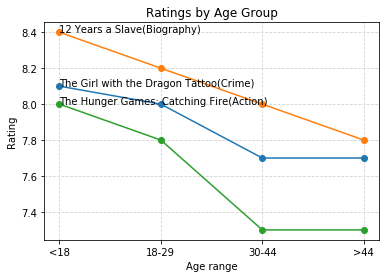




----------------------------------------------------------------------

Plot2: Percentage of raters within gender-age. Select a movie: 

Enter movie keyword: name

Enter movie keyword: it
Which of the following movies would you like to pick (enter number)
        1 Gravity
        2 The Girl with the Dragon Tattoo
        3 The Hobbit: An Unexpected Journey
        4 The Hobbit: The Desolation of Smaug
        5 The Imitation Game
        6 The Little Prince
        7 True Grit
        8 Wreck-It Ralph
enter a number: 8
Movie #1: 'Wreck-It Ralph'


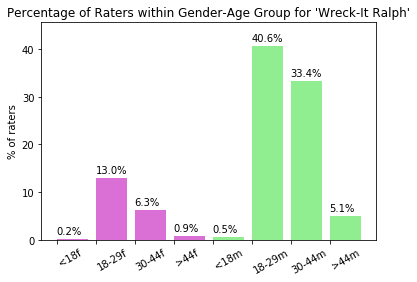

In [6]:
main()